In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df=pd.read_csv('Salary_Data.csv')

In [26]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [27]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


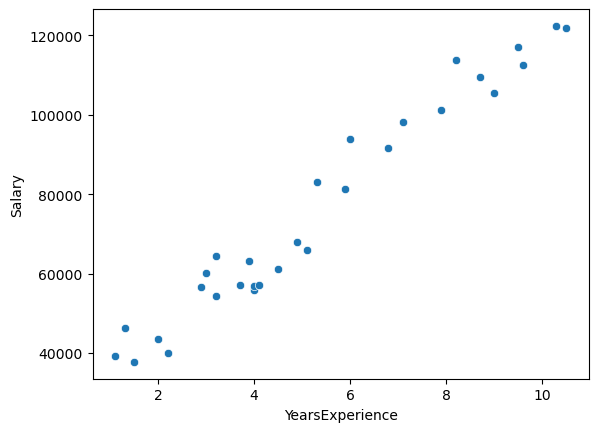

In [29]:
sns.scatterplot(x=df['YearsExperience'],y=df['Salary'])
plt.show()

In [8]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


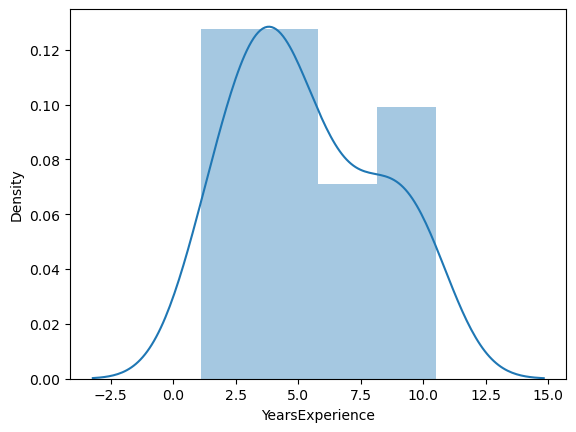

In [9]:
sns.distplot(df['YearsExperience'])
plt.show()

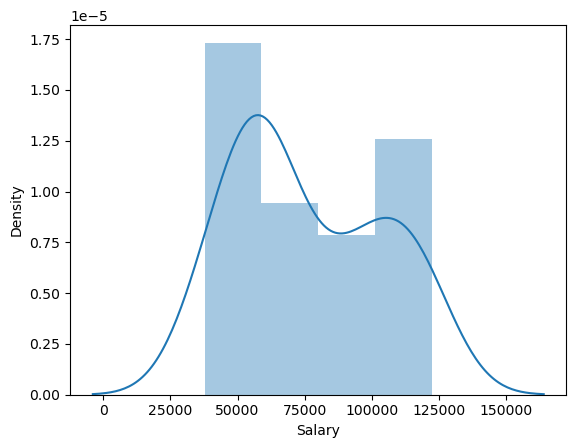

In [10]:
sns.distplot(df['Salary'])
plt.show()

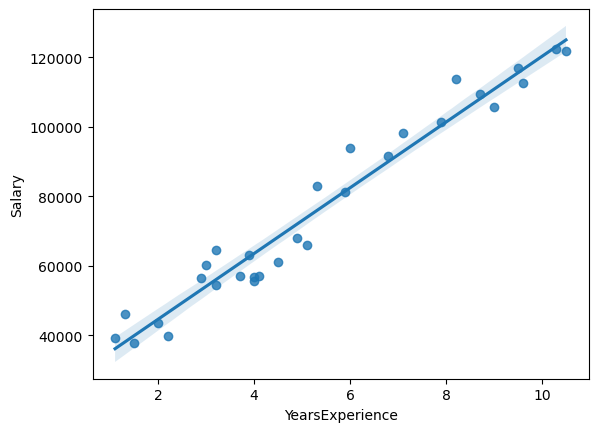

In [11]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])
plt.show()

In [12]:
import statsmodels.formula.api as smf

In [13]:
model=smf.ols(formula='Salary ~ YearsExperience',data=df).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        15:27:37   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [16]:
print(model.tvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64


In [17]:
print(model.pvalues)

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [18]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [19]:
#Build a prediction model for Salary_hike

In [20]:
new_data=pd.Series([10,3,5,25])
new_data

0    10
1     3
2     5
3    25
dtype: int64

In [21]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,10
1,3
2,5
3,25


In [22]:
model.predict(data_pred)

0    120291.823413
1     54142.087163
2     73042.011806
3    262041.258235
dtype: float64